In [13]:
import pandas as pd
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [30]:
target_terms = ["@CBSNews", "@FoxNews", "@CNN", "@BBCNews", "@NYTimes"]

compound_list = []
positive_list = []
neutral_list = []
negative_list = []
source_list = []
tweet_list = []
date_list = []
counter_list = []


counter = 0
for news in target_terms:
    for x in range(5):
        # Get all tweets from target user
        public_tweets = api.user_timeline(news, page=x)
        for tweet in public_tweets:
            name = tweet["user"]["name"]
            date = tweet["created_at"]
            text = tweet["text"]
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            if counter == 100:
                counter = 1
            else: 
                counter = counter + 1
            #append to list 
            source_list.append(name)
            date_list.append(date)
            tweet_list.append(text)
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)
            counter_list.append(counter)

len(negative_list)
            

500

In [32]:
news_df = pd.DataFrame(
    {'News Station': source_list,
     'Tweet': tweet_list,
     'Date': date_list,
     'Tweets Ago': counter_list,
     'Compound Score': compound_list,
     'Positive Score': positive_list,
     'Neutral Score': neutral_list,
     'Negative Score': negative_list
    })
news_df.head()

,Compound Score,Date,Negative Score,Neutral Score,News Station,Positive Score,Tweet,Tweets Ago
0,-0.4588,Sat Dec 02 03:00:24 +0000 2017,0.286,0.714,CBS News,0.000,"Navy commander sentenced for role in ""Fat Leon...",1
1,0.4678,Sat Dec 02 03:00:01 +0000 2017,0.000,0.845,CBS News,0.155,Comedy legend Carol Burnett is one of the funn...,2
2,-0.3384,Sat Dec 02 02:40:01 +0000 2017,0.138,0.862,CBS News,0.000,"Analysis: Robert Mueller's investigation ""shou...",3
3,-0.2732,Sat Dec 02 02:20:01 +0000 2017,0.198,0.660,CBS News,0.142,United Nations war crimes tribunal orders inde...,4
4,-0.1531,Sat Dec 02 02:00:02 +0000 2017,0.147,0.734,CBS News,0.119,Seeing potential in a Minnesota woman addicted...,5


In [43]:
news_df = news_df[['News Station', 'Tweet', 'Date', 'Tweets Ago', 'Compound Score', 'Positive Score', 'Neutral Score', 'Negative Score']]
news_df.to_csv("CSV/DataFrame.csv")
news_df["News Station"].unique()


array(['CBS News', 'Fox News', 'CNN', 'BBC News (UK)', 'The New York Times'], dtype=object)

In [41]:
#plot the compouund sentiment scores
#(austin_df['Outcome_Type'] == "Adoption")
cbs_df=news_df.loc[(news_df['News Station'] == "CBS News") , ["News Station", "Tweets Ago", "Compound Score"]]
cbs_df.head()

,News Station,Tweets Ago,Compound Score
0,CBS News,1,-0.4588
1,CBS News,2,0.4678
2,CBS News,3,-0.3384
3,CBS News,4,-0.2732
4,CBS News,5,-0.1531


In [ ]:
cbs_df=news_df.loc[(news_df['News Station'] == "CBS News") , ["News Station", "Tweets Ago", "Compound Score"]]
cbs_df.head()

In [ ]:
cbs_df=news_df.loc[(news_df['News Station'] == "CBS News") , ["News Station", "Tweets Ago", "Compound Score"]]
cbs_df.head()

In [ ]:
cbs_df=news_df.loc[(news_df['News Station'] == "CBS News") , ["News Station", "Tweets Ago", "Compound Score"]]
cbs_df.head()

In [ ]:
cbs_df=news_df.loc[(news_df['News Station'] == "CBS News") , ["News Station", "Tweets Ago", "Compound Score"]]
cbs_df.head()

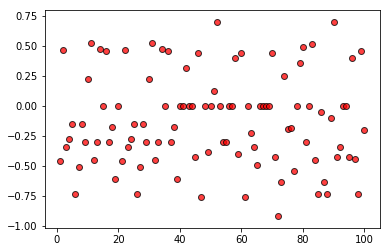

In [40]:
x_axis = compound_df["Tweets Ago"]
data = compound_df["Compound Score"]
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.show()

In [45]:
#Bar Chart
group_df = news_df.groupby("News Station")
bar_df = group_df["Compound Score"].mean()
bar_df

News Station
BBC News (UK)        -0.135072
CBS News             -0.119658
CNN                  -0.014202
Fox News             -0.149389
The New York Times   -0.098724
Name: Compound Score, dtype: float64